# Copied Matt's Hello World, adapting for Omon O2 and CO2 fluxes

* step1

In [3]:
%matplotlib inline

import xarray as xr
import intake

# util.py is in the local directory
# it contains code that is common across project notebooks
# or routines that are too extensive and might otherwise clutter
# the notebook design
import util 

## Use `intake-esm` to access all available model output

[Intake-esm](https://intake-esm.readthedocs.io) is a data cataloging utility that facilitates access to CMIP data. It's pretty awesome.

An `intake-esm` collection object establishes a link to a database that contains file locations and associated metadata (i.e. which experiement, model, etc. thet come from). 

### Opening a collection
First step is to open a collection by pointing to the collection definition file, which is a JSON file that conforms to the [ESM Collection Specification](https://github.com/NCAR/esm-collection-spec). 

The collection JSON files are stored locally in this repository for purposes of reproducibility---and because Cheyenne compute nodes don't have Internet access. 

The primary source for these files is the [intake-esm-datastore](https://github.com/NCAR/intake-esm-datastore) repository. Any changes made to these files should be pulled from that repo. For instance, the Pangeo cloud collection is available [here](https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json).

In [4]:
if util.is_ncar_host():
    col = intake.open_esm_datastore("../cmip6hack-ocean-bgc/catalogs/glade-cmip6.json")
else:
    col = intake.open_esm_datastore("../cmip6hack-ocean-bgc/catalogs/pangeo-cmip6.json")
col

glade-cmip6-ESM Collection with 698724 entries:
	> 13 activity_id(s)

	> 24 institution_id(s)

	> 47 source_id(s)

	> 68 experiment_id(s)

	> 162 member_id(s)

	> 35 table_id(s)

	> 1027 variable_id(s)

	> 12 grid_label(s)

	> 59 dcpp_init_year(s)

	> 248 version(s)

	> 6813 time_range(s)

	> 698724 path(s)

`intake-esm` is build on top of [pandas](https://pandas.pydata.org/pandas-docs/stable). It is possible to view the `pandas.DataFrame` as follows.

In [5]:
col.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,day,pr,gn,NaN,v20190702,20150101-20551231,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
1,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,hfls,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
2,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,prsn,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
3,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,va,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...
4,AerChemMIP,BCC,BCC-ESM1,ssp370,r2i1p1f1,Amon,tas,gn,NaN,v20190624,201501-205512,/glade/collections/cmip/CMIP6/AerChemMIP/BCC/B...


It is possible to interact with the `DataFrame`; for instance, we can see what the "attributes" of the datasets are by printing the columns.

In [6]:
col.df.columns

Index(['activity_id', 'institution_id', 'source_id', 'experiment_id',
       'member_id', 'table_id', 'variable_id', 'grid_label', 'dcpp_init_year',
       'version', 'time_range', 'path'],
      dtype='object')

### Search and discovery

#### Find unique entries
Query the data to see what models ("source_id"), experiments ("experiment_id") and temporal frequencies ("table_id") are available.

In [7]:
import pprint 
uni_dict = col.unique(['source_id', 'experiment_id', 'table_id'])
pprint.pprint(uni_dict, compact=True)

{'experiment_id': {'count': 68,
                   'values': ['ssp370', 'histSST-piNTCF', 'histSST',
                              'histSST-1950HC', 'hist-1950HC', 'hist-piNTCF',
                              'piClim-NTCF', 'ssp370SST-lowNTCF',
                              'ssp370-lowNTCF', 'ssp370SST', '1pctCO2-bgc',
                              'hist-bgc', 'esm-ssp585', 'amip-future4K',
                              'amip-m4K', 'a4SST', 'aqua-p4K', 'piSST',
                              'amip-4xCO2', 'a4SSTice', 'amip-p4K',
                              'aqua-control', 'aqua-4xCO2', 'abrupt-4xCO2',
                              'historical', 'piControl', 'amip', '1pctCO2',
                              'esm-hist', 'esm-piControl', 'ssp245', 'ssp585',
                              'ssp126', 'hist-GHG', 'hist-aer',
                              'dcppA-hindcast', 'dcppC-hindcast-noPinatubo',
                              'dcppC-hindcast-noElChichon', 'dcppA-assim',
                   

#### Searching for specific datasets

Find all the O2 and CO2 flux data at monthly frequency from the ocean for the `historical` and `hist-bgc` experiments. Note: NorESM2 files are 10 years each, so there are many of these.

In [9]:
# cat = col.search(experiment_id=['historical', 'ssp585'], table_id='Oyr', variable_id='o2', grid_label='gn')
cat = col.search(experiment_id=['historical', 'hist-bgc'], table_id='Omon', grid_label='gn', variable_id=['fgo2','fgco2'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
11444,C4MIP,CNRM-CERFACS,CNRM-ESM2-1,hist-bgc,r1i1p1f2,Omon,fgo2,gn,NaN,v20190711,185001-201412,/glade/collections/cmip/CMIP6/C4MIP/CNRM-CERFA...
11449,C4MIP,MOHC,UKESM1-0-LL,hist-bgc,r4i1p1f2,Omon,fgo2,gn,NaN,v20190829,185001-194912,/glade/collections/cmip/CMIP6/C4MIP/MOHC/UKESM...
11461,C4MIP,NASA-GISS,GISS-E2-1-G,hist-bgc,r101i1p1f1,Omon,fgco2,gn,NaN,v20190815,185001-190012,/glade/collections/cmip/CMIP6/C4MIP/NASA-GISS/...
11462,C4MIP,NASA-GISS,GISS-E2-1-G,hist-bgc,r101i1p1f1,Omon,fgco2,gn,NaN,v20190815,195101-200012,/glade/collections/cmip/CMIP6/C4MIP/NASA-GISS/...
11463,C4MIP,NASA-GISS,GISS-E2-1-G,hist-bgc,r101i1p1f1,Omon,fgco2,gn,NaN,v20190815,190101-195012,/glade/collections/cmip/CMIP6/C4MIP/NASA-GISS/...
...,...,...,...,...,...,...,...,...,...,...,...,...
560186,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Omon,fgco2,gn,NaN,v20190815,190001-190912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
560187,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Omon,fgco2,gn,NaN,v20190815,200001-200912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
560188,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Omon,fgco2,gn,NaN,v20190815,194001-194912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...
560189,CMIP,NCC,NorESM2-LM,historical,r1i1p1f1,Omon,fgco2,gn,NaN,v20190815,186001-186912,/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2...


It might be desirable to get more specific. For instance, we may want to select only the models that have *both* `fgo2` and `fgco2` data. We coud do this as follows.

In [10]:
models = set(uni_dict['source_id']['values']) # all the models

#for variable_id in ['fgo2', 'fgco2', 'fgco2abio', 'fgco2nat', 'tos', 'sos', 'hfds']:
for variable_id in ['fgo2', 'fgco2']:
    query = dict(variable_id=variable_id, experiment_id='historical', table_id='Omon', 
                 grid_label='gn', member_id='r1i1p1f1')  
    cat = col.search(**query)
    models = models.intersection({model for model in cat.df.source_id.unique().tolist()})

# ensure the CESM2 models are not included (oxygen was erroneously submitted to the archive)
models = models - {'CESM2-WACCM', 'CESM2'} # tested just to look at without , 'NorESM2-LM'}

models = list(models)
models

['IPSL-CM6A-LR', 'CanESM5', 'NorESM2-LM']

In [ ]:
# old workaround before intake ESM fixed
#variables = ['fgo2', 'fgco2','tos','sos']
#dsets = {}
#for variable in variables:
#   cat = col.search(variable_id= variable,experiment_id='historical', table_id='Omon',
#                     grid_label='gn', member_id='r1i1p1f1', source_id=models) #,'hfds'
#   dsets[variable] = cat.to_dataset_dict()
#dsets

In [ ]:
#dsets['fgo2'].keys()

In [ ]:
#dsets['fgo2']['CMIP.CCCma.CanESM5.historical.Omon.gn']

In [11]:
cat = col.search(experiment_id='historical', variable_id=['fgo2', 'fgco2'], table_id='Omon', 
                 grid_label='gn', source_id=models, member_id='r1i1p1f1')
#cat.df
cat.df.path.tolist()

['/glade/collections/cmip/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/fgo2/gn/v20190429/fgo2/fgo2_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc',
 '/glade/collections/cmip/CMIP6/CMIP/CCCma/CanESM5/historical/r1i1p1f1/Omon/fgco2/gn/v20190429/fgco2/fgco2_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc',
 '/glade/collections/cmip/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/fgo2/gn/v20180803/fgo2/fgo2_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-201412.nc',
 '/glade/collections/cmip/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Omon/fgco2/gn/v20180803/fgco2/fgco2_Omon_IPSL-CM6A-LR_historical_r1i1p1f1_gn_185001-201412.nc',
 '/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/fgo2/gn/v20190815/fgo2/fgo2_Omon_NorESM2-LM_historical_r1i1p1f1_gn_199001-199912.nc',
 '/glade/collections/cmip/CMIP6/CMIP/NCC/NorESM2-LM/historical/r1i1p1f1/Omon/fgo2/gn/v20190815/fgo2/fgo2_Omon_NorESM2-LM_historical_r1i1p1f1_gn_194001-194912.nc',
 '/glade/colle

### Loading data

`intake-esm` enables loading data directly into an [xarray.Dataset](http://xarray.pydata.org/en/stable/api.html#dataset).

Note that data on the cloud are in 
[zarr](https://zarr.readthedocs.io/en/stable/) format and data on 
[glade](https://www2.cisl.ucar.edu/resources/storage-and-file-systems/glade-file-spaces) are stored as 
[netCDF](https://www.unidata.ucar.edu/software/netcdf/) files. This is opaque to the user.

`intake-esm` has rules for aggegating datasets; these rules are defined in the collection-specification file.

In [12]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times': False}, 
                                cdf_kwargs={'chunks': {'time': 36}, 'decode_times': False})

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 3 group(s)


`dset_dict` is a dictionary of `xarray.Dataset`'s; its keys are constructed to refer to compatible groups.

In [13]:
dset_dict.keys()

dict_keys(['CMIP.CCCma.CanESM5.historical.Omon.gn', 'CMIP.IPSL.IPSL-CM6A-LR.historical.Omon.gn', 'CMIP.NCC.NorESM2-LM.historical.Omon.gn'])

We can access a particular dataset as follows.

In [32]:
#dset_dict['CMIP.BCC.BCC-CSM2-MR.historical.Omon.gn']
ds=dset_dict['CMIP.CCCma.CanESM5.historical.Omon.gn']
#canesmfgo2ds.sel[i==0,j==0]
print("*** Dimensions")
print(ds.dims)
print("\n\n*** Coordinates")
print(ds.coords)
print("\n\n*** Attributes")
print(ds.attrs)

*** Dimensions
Frozen(SortedKeysDict({'j': 291, 'i': 360, 'vertices': 4, 'member_id': 1, 'time': 1980, 'bnds': 2}))


*** Coordinates
Coordinates:
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * member_id  (member_id) <U8 'r1i1p1f1'
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) float64 15.5 45.0 74.5 ... 6.015e+04 6.018e+04 6.021e+04


*** Attributes
{'parent_time_units': 'days since 1850-01-01 0:0:0.0', 'experiment': 'all-forcing simulation of the recent past', 'nominal_resolution': '100 km', 'institution_id': 'CCCma', 'branch_time_in_child': 0.0, 'parent_mip_era': 'CMIP6', 'realm': 'ocnBgchem', 'forcing_index': 1, 'table_id': 'Omon', 'external_variables': 'areacello', 'source_type': 'AOGCM', 'sub_experiment_id': 'none', 'YMDH_branch_time_in_parent': '5201:01:01:00', 'CCCma_model_hash': '3dedf95315d603326fde4f5340dc0519d80d10c0', 'institution': 'Canadian Centre for Climate Modelling and Analysis,

In [35]:
da=ds['fgo2']
print("*** Dimensions")
print(da.dims)
print("\n\n*** Coordinates")
print(da.coords)
print("\n\n*** Attributes")
print(da.attrs)

*** Dimensions
('member_id', 'time', 'j', 'i')


*** Coordinates
Coordinates:
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
  * member_id  (member_id) <U8 'r1i1p1f1'
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * time       (time) float64 15.5 45.0 74.5 ... 6.015e+04 6.018e+04 6.021e+04


*** Attributes
{'standard_name': 'surface_downward_mole_flux_of_molecular_oxygen', 'long_name': 'Surface Downward Flux of O2', 'comment': 'Gas exchange flux of O2 (positive into ocean)', 'units': 'mol m-2 s-1', 'original_name': 'Oflx', 'cell_methods': 'area: mean where sea time: mean', 'cell_measures': 'area: areacello', 'history': "2019-05-01T03:04:13Z altered by CMOR: Treated scalar dimension: 'depth'."}


In [46]:
ds

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 360, j: 291, member_id: 1, time: 1980, vertices: 4)
Coordinates:
  * j                   (j) int32 0 1 2 3 4 5 6 ... 284 285 286 287 288 289 290
  * member_id           (member_id) <U8 'r1i1p1f1'
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * time                (time) float64 15.5 45.0 74.5 ... 6.018e+04 6.021e+04
Dimensions without coordinates: bnds, vertices
Data variables:
    latitude            (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    depth               float64 0.0
    longitude           (j, i) float64 dask.array<chunksize=(291, 360), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(291, 360, 4), meta=np.ndarray>
    time_bnds           (time, bnds) float64 dask.array<chunksize=(36, 2), meta=np.ndarray>
    fgco2          

In [40]:
# isel is index select
da.isel(i=0, j=0)

<xarray.DataArray 'fgo2' (member_id: 1, time: 1980)>
dask.array<getitem, shape=(1, 1980), dtype=float32, chunksize=(1, 36), chunktype=numpy.ndarray>
Coordinates:
    j          int32 0
  * member_id  (member_id) <U8 'r1i1p1f1'
    i          int32 0
  * time       (time) float64 15.5 45.0 74.5 ... 6.015e+04 6.018e+04 6.021e+04
Attributes:
    standard_name:  surface_downward_mole_flux_of_molecular_oxygen
    long_name:      Surface Downward Flux of O2
    comment:        Gas exchange flux of O2 (positive into ocean)
    units:          mol m-2 s-1
    original_name:  Oflx
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    history:        2019-05-01T03:04:13Z altered by CMOR: Treated scalar dime...

In [60]:
ds.latitude

<xarray.DataArray 'latitude' (j: 291, i: 360)>
dask.array<where, shape=(291, 360), dtype=float64, chunksize=(291, 360), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int32 0 1 2 3 4 5 6 7 8 ... 282 283 284 285 286 287 288 289 290
  * i        (i) int32 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    bounds:         vertices_latitude

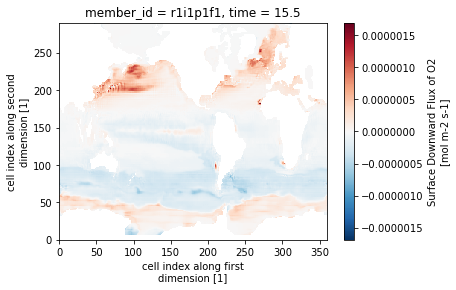

In [65]:
da.sel(time=15.5)
da.isel(time=0)
#da.where(ds.latitude<-44&ds.longitude>270&ds.longitude<300)
#da.where((ds.latitude < -44)).squeeze().isel(time=0).plot()
da.isel(time=0).plot()

In [68]:
# try to make DJf average
da.groupby('time.month')

AttributeError: 'IndexVariable' object has no attribute 'month'

## Import cartopy

In [16]:
# Importing CartoPy, Matplotlib, and numpy
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create a figure
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(times, temps)
fig

#canesmds.fgo2.plot()

### More advanced queries

As motivation for diving into more advanced manipulations with `intake-esm`, let's consider the task of getting access to grid information in the `Ofx` table_id.

In [ ]:
cat_fx = col.search(experiment_id=['historical'], source_id=models, table_id='Omon', grid_label='gn')
cat_fx.df

This, however, comes with lots of redundant information.

Additionally, it may be necessary to do more targeted manipulations of the search. For instance, we've found a handful of corrupted files on `glade` and might need to work around loading these. 

As an illustration of this, in the code below, we specify a list of to queries (in this case one) to eliminate.

In [ ]:
# specify a list of queries to eliminate
corrupt_data = [dict(variable_id='areacello', source_id='IPSL-CM6A-LR',
                     experiment_id='historical', member_id='r2i1p1f1')
               ]


# copy the dataframe 
df = cat_fx.df.copy()

# eliminate data
for elim in corrupt_data:
    condition = np.ones(len(df), dtype=bool)
    for key, val in elim.items():
        condition = condition & (df[key] == val)
    df = df.loc[~condition]
df    

We then drop duplicates.

In [ ]:
df.drop_duplicates(subset=['source_id', 'variable_id'], inplace=True)

Now, since we've only retained one ensemble member, we need to eliminate that column. If we omit this step, `intake-esm` will throw an error, complaining that different variables are present for each ensemble member. Setting the `member_id` column to NaN precludes attempts to join along the ensemble dimension.

After this final manipulation, we copy the `DataFrame` back to the collection object and proceed with loading the data.

In [ ]:
df['member_id'] = np.nan
cat_fx.df = df

In [ ]:
fx_dsets = cat_fx.to_dataset_dict(zarr_kwargs={'consolidated': True}, cdf_kwargs={'chunks': {}})

In [ ]:
fx_dsets.keys()

In [ ]:
for key, ds in fx_dsets.items():
    print(ds.data_vars)

## Demonstrate how spin-up a dask cluster

If you expect to require Big Data capabilities, here's how you spin up a [dask](https://dask.org) cluster using [dask-jobqueue](https://dask-jobqueue.readthedocs.io/en/latest/).

The syntax is different if on an NCAR machine versus the cloud.

In [ ]:
if util.is_ncar_host():
    from ncar_jobqueue import NCARCluster
    cluster = NCARCluster(project='UCGD0006')
    cluster.adapt(minimum_jobs=1, maximum_jobs=10)
else:
    from dask_kubernetes import KubeCluster
    cluster = KubeCluster()
    cluster.adapt(minimum=1, maximum=10)
cluster

In [ ]:
from dask.distributed import Client
client = Client(cluster) # Connect this local process to remote workers
client